In [1]:
import numpy as np
from enmspring.graphs import BackboneRibose, EigenPlotBackboneRibose
import matplotlib.pyplot as plt
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'
rtol=1e-05
atol=1e-08

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
g_agent = BackboneRibose(host, rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists


### Part 2: Build Node List

In [3]:
g_agent.build_node_list()
g_agent.initialize_three_mat()

Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.


### Part 3: Build Adjacency Matrix

In [7]:
g_agent.build_adjacency_from_pp_r()

In [8]:
# Check Matrix Symmetrix
np.allclose(g_agent.adjacency_mat, g_agent.adjacency_mat.T, rtol=rtol, atol=atol)

True

### Part 4: Build Degree Matrix

In [6]:
g_agent.build_degree_from_adjacency()

In [7]:
# Check diagonal matrix
np.allclose(g_agent.degree_mat, np.diag(np.diag(g_agent.degree_mat))) # check if diagonal

True

### Part 5: Build Laplacian Matrix

In [10]:
g_agent.build_laplacian_by_adjacency_degree()

Finish the setup for Laplaican matrix.


In [11]:
# Check Matrix Symmetrix
np.allclose(g_agent.laplacian_mat, g_agent.laplacian_mat.T, rtol=rtol, atol=atol)

True

### Part 6: Do Eigen-decomposition
Reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [12]:
w, v = np.linalg.eig(g_agent.laplacian_mat)

In [13]:
# Sort
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

### Part 7: Eigenvalue Plot

In [4]:
e_agent = EigenPlotBackboneRibose(rootfolder)

In [5]:
e_agent.initailize_six_systems()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There

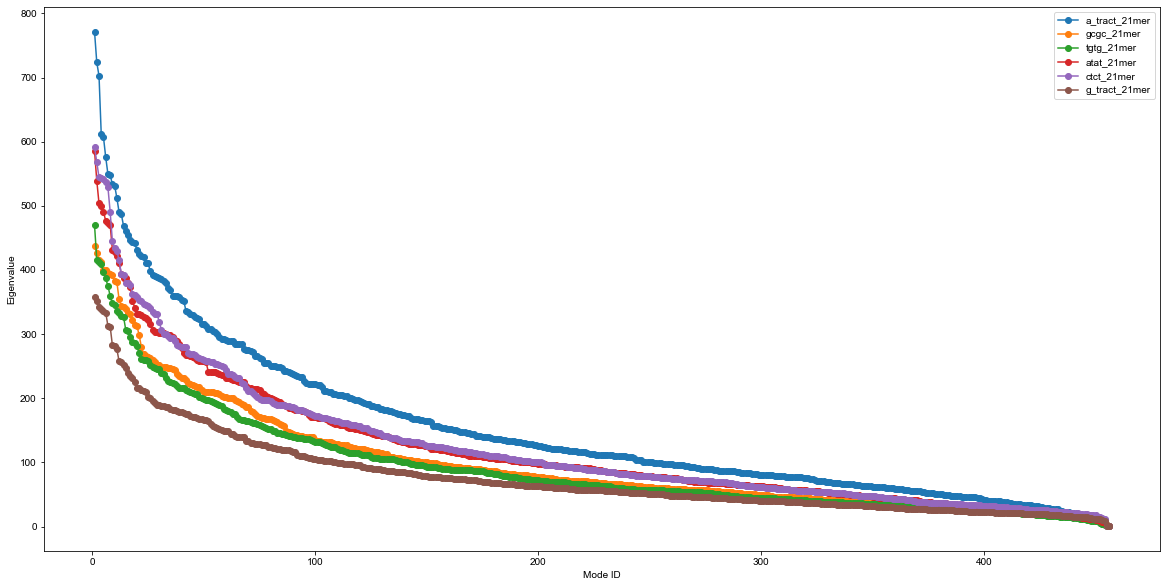

In [6]:
figsize = (20, 10)
e_agent.plot_lambda_six_together(figsize)
#plt.savefig('Rigidity_graph_eigenvalue_basestack+hb.png', dpi=200)
plt.show()

### Part 8: Eigenvector

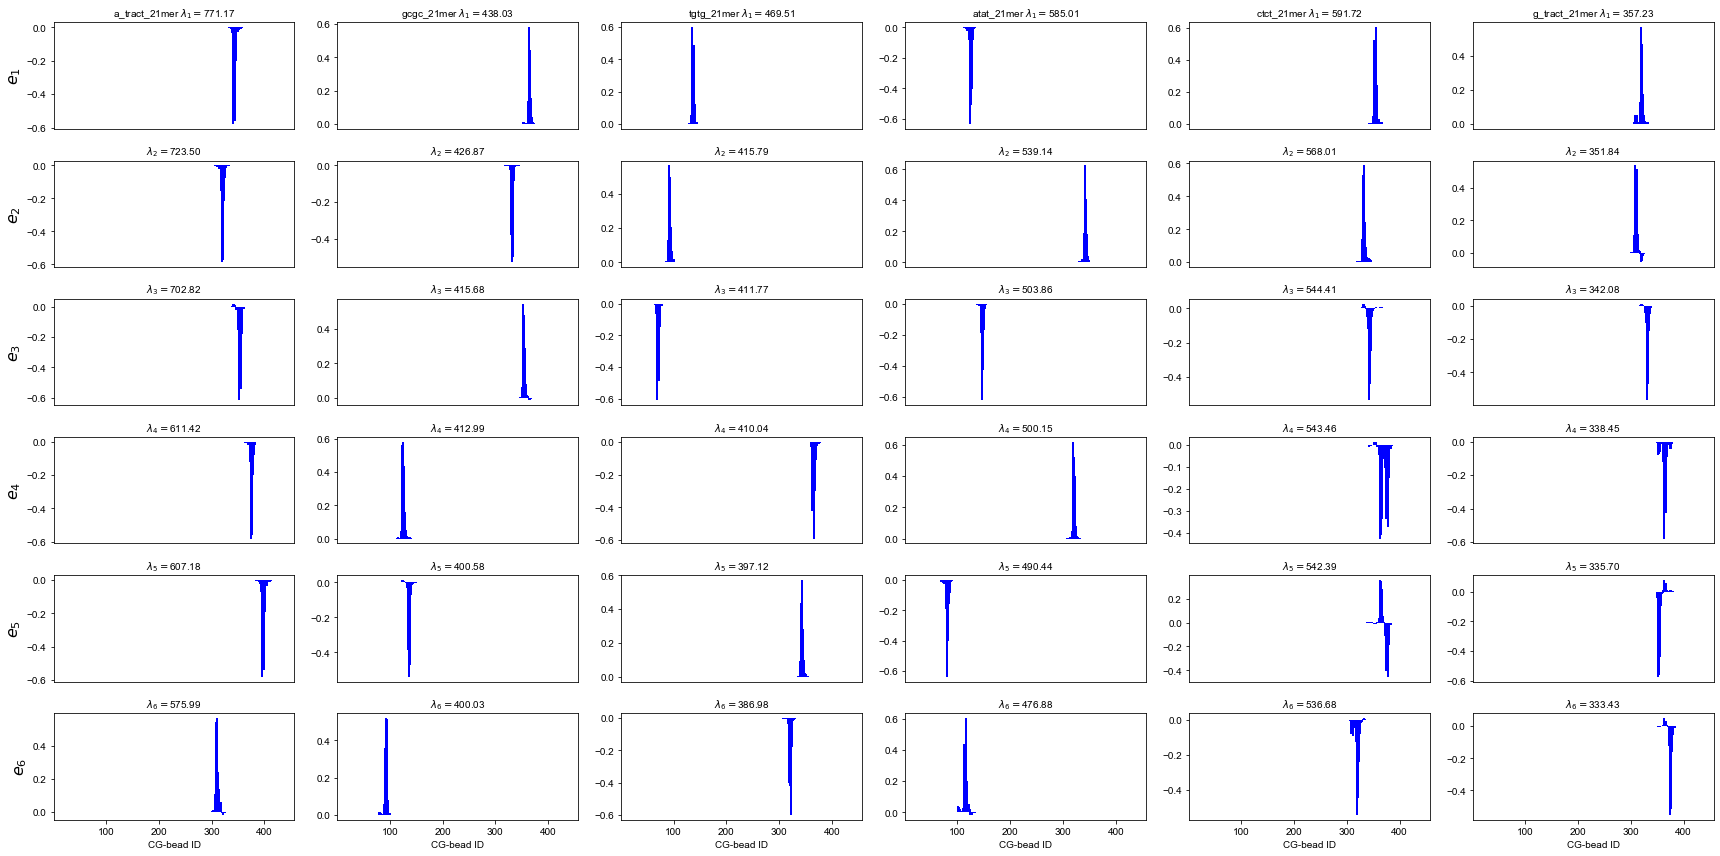

In [7]:
figsize = (24, 12)
hspace = 0.18
wspace = 0.2
eigv_id_list = [1,2,3,4,5,6]
lw = 2
fig, d_axes = e_agent.plot_eigenvector(figsize, hspace, wspace, eigv_id_list, lw)
#plt.savefig('eigenvector_basestack+hb_1_6.png', dpi=200)
plt.show()

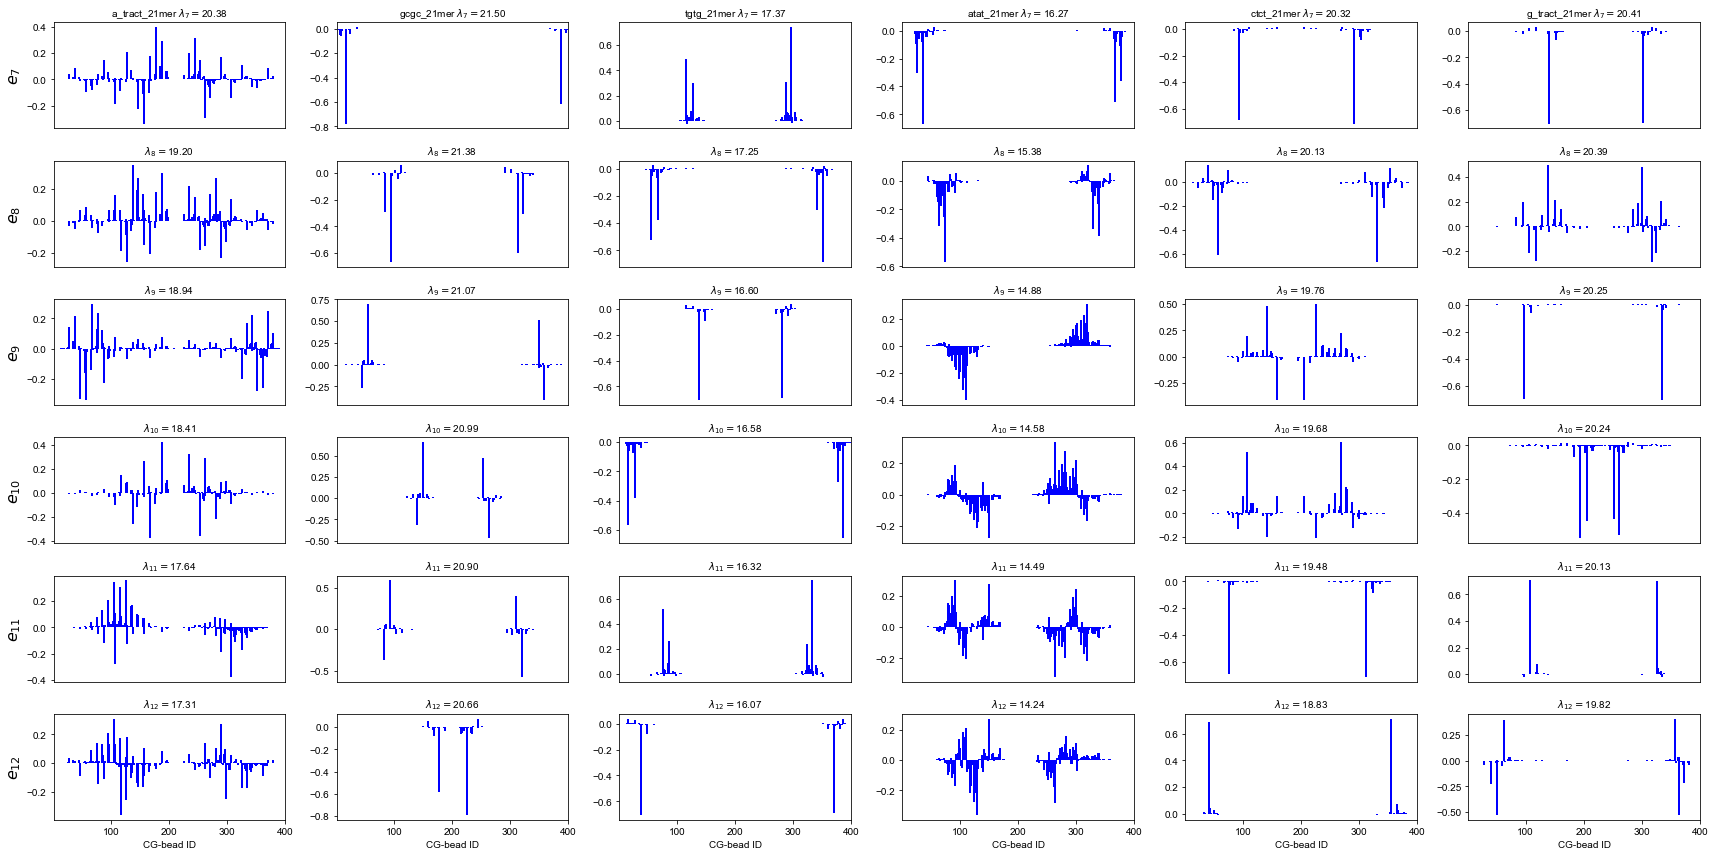

In [5]:
figsize = (24, 12)
hspace = 0.18
wspace = 0.2
eigv_id_list = [7,8,9,10,11,12]
lw = 2
fig, d_axes = e_agent.plot_eigenvector(figsize, hspace, wspace, eigv_id_list, lw)
#plt.savefig('eigenvector_basestack+hb_7_12.png', dpi=200)
plt.show()

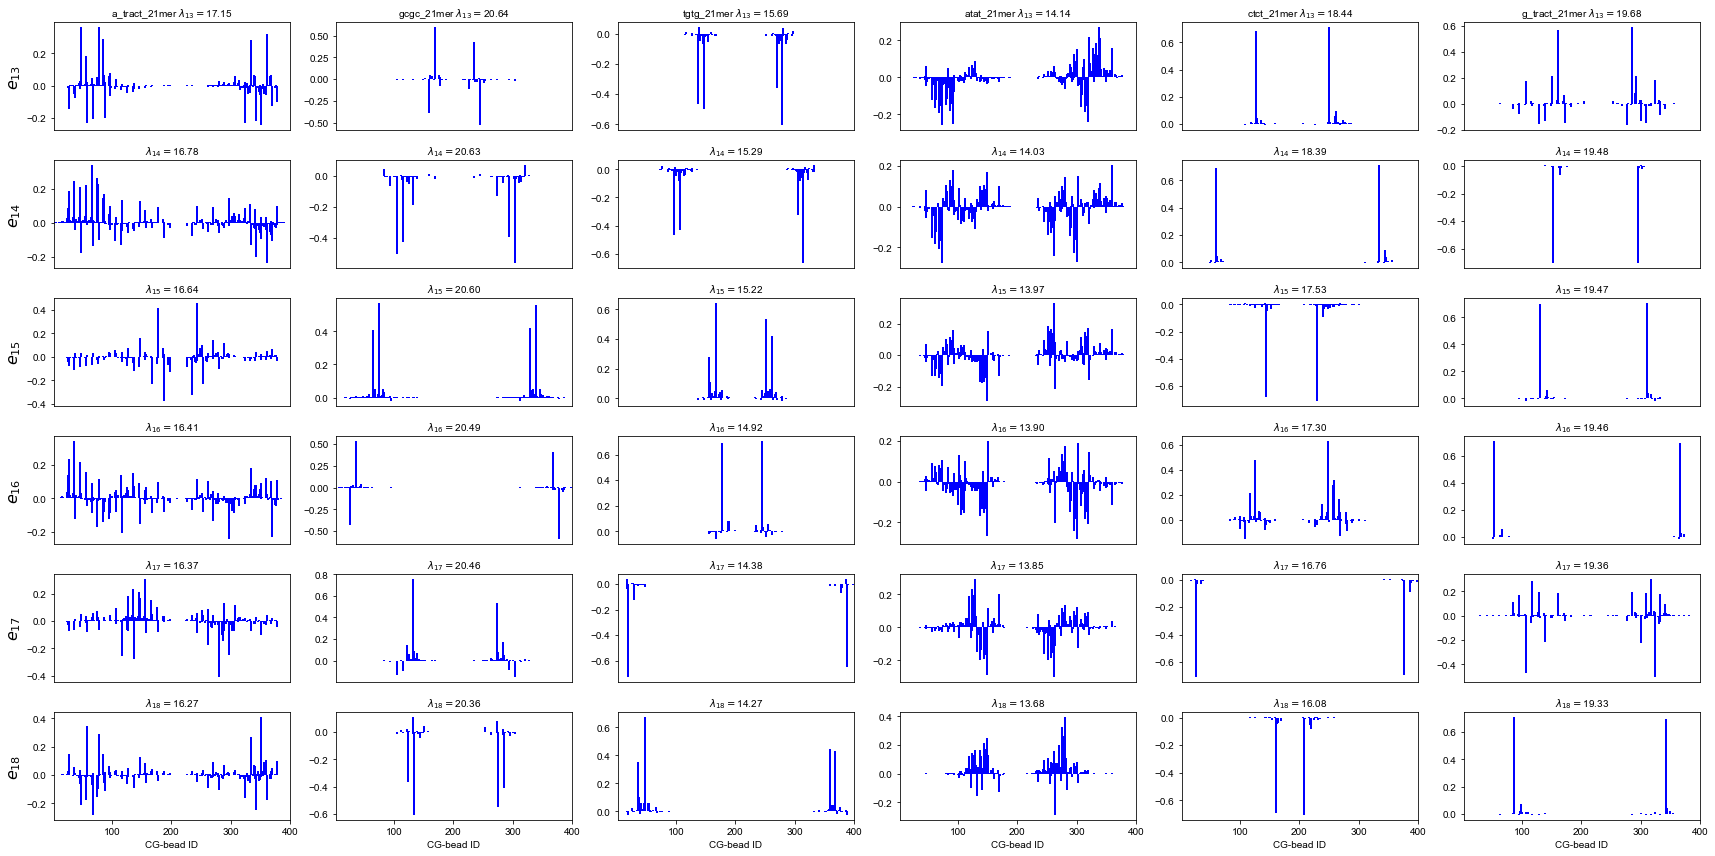

In [6]:
figsize = (24, 12)
hspace = 0.18
wspace = 0.2
eigv_id_list = [13, 14, 15, 16, 17, 18]
lw = 2
fig, d_axes = e_agent.plot_eigenvector(figsize, hspace, wspace, eigv_id_list, lw)
#plt.savefig('eigenvector_basestack+hb_13_18.png', dpi=200)
plt.show()

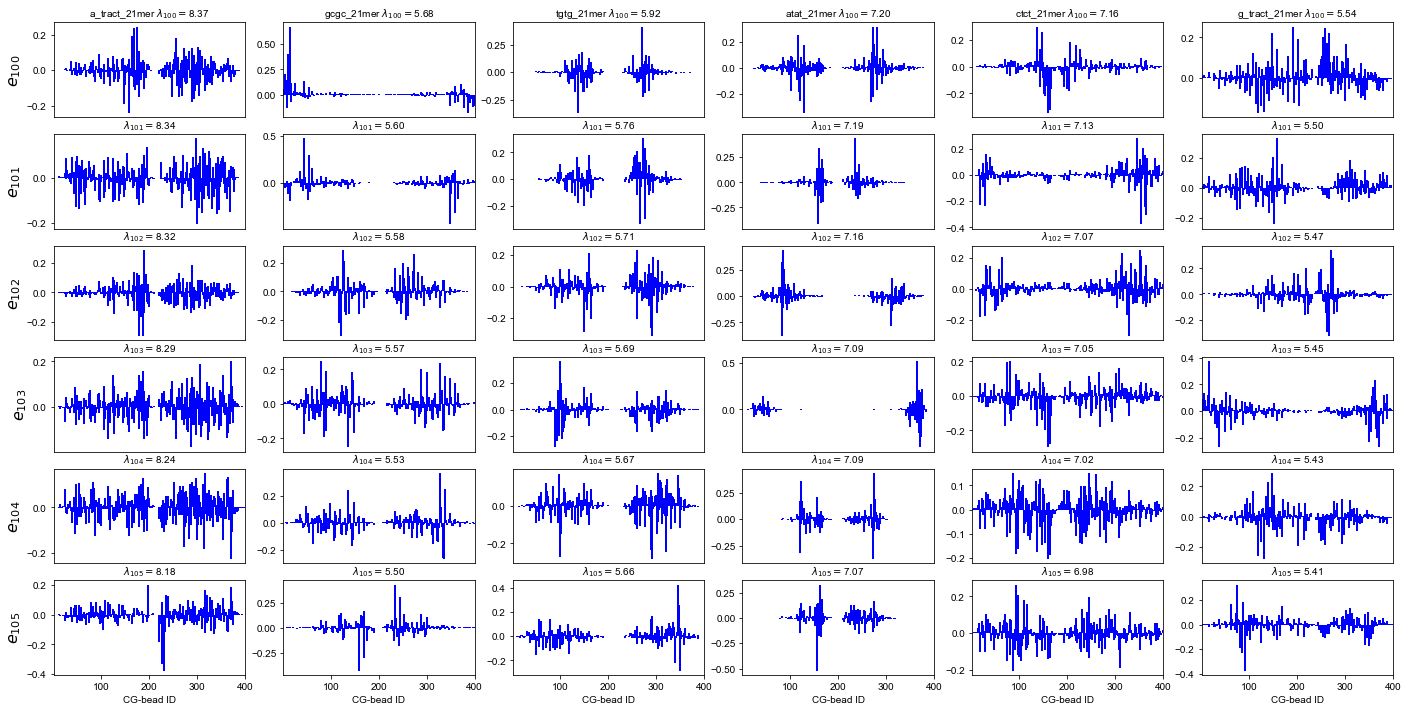

In [12]:
figsize = (24, 12)
hspace = 0.18
wspace = 0.2
start = 100
eigv_id_list = range(start, start+6)
lw = 2
fig, d_axes = e_agent.plot_eigenvector(figsize, hspace, wspace, eigv_id_list, lw)
plt.show()

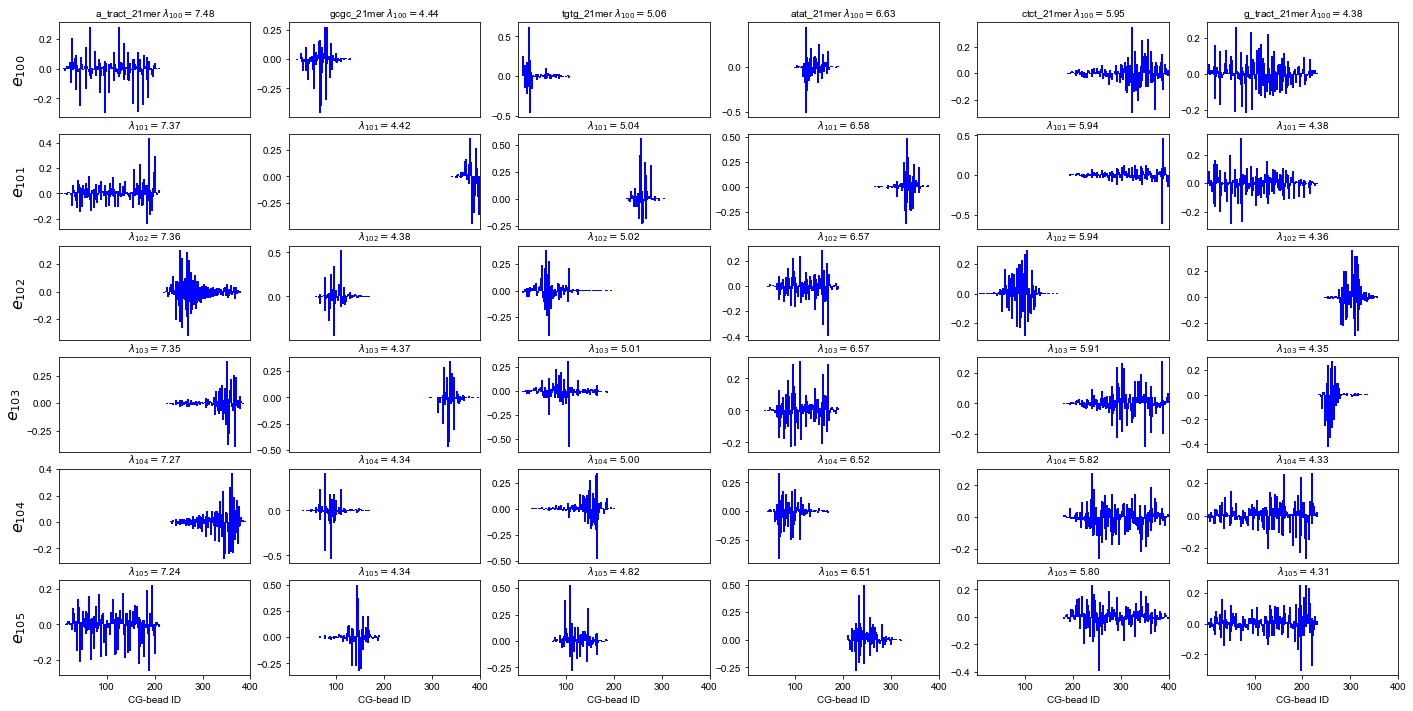

In [11]:
figsize = (24, 12)
hspace = 0.18
wspace = 0.2
start = 100
eigv_id_list = range(start, start+6)
lw = 2
fig, d_axes = e_agent.plot_eigenvector(figsize, hspace, wspace, eigv_id_list, lw)
plt.show()

### Part 9: Observe

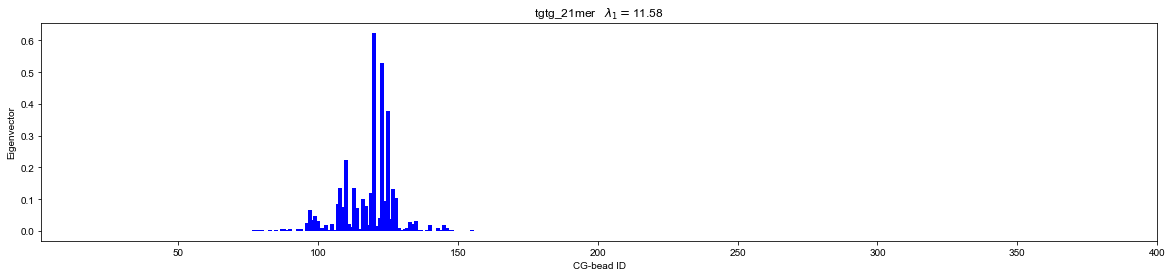

In [93]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

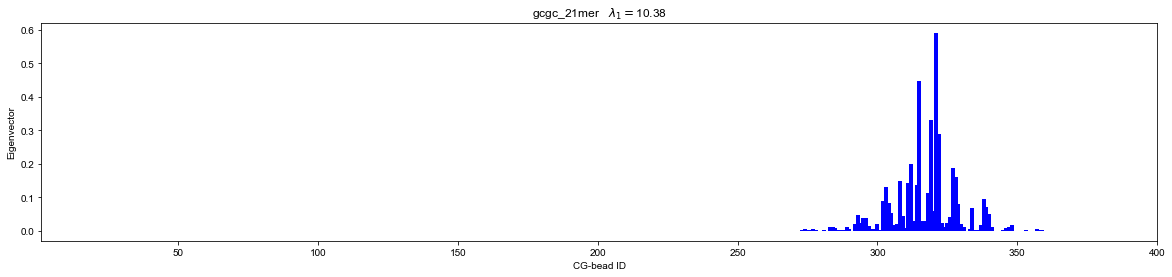

In [81]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

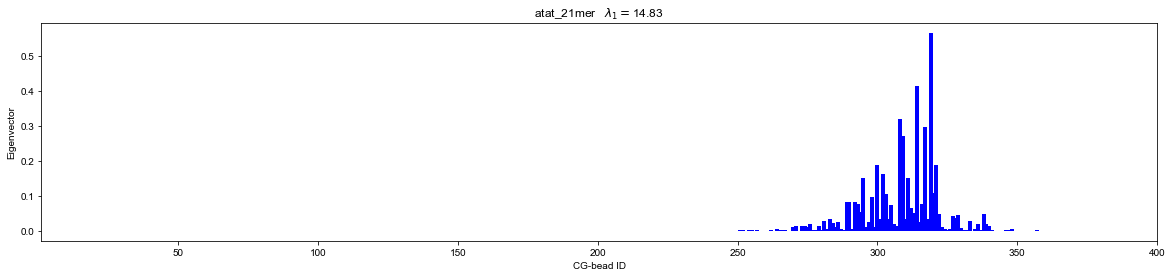

In [69]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

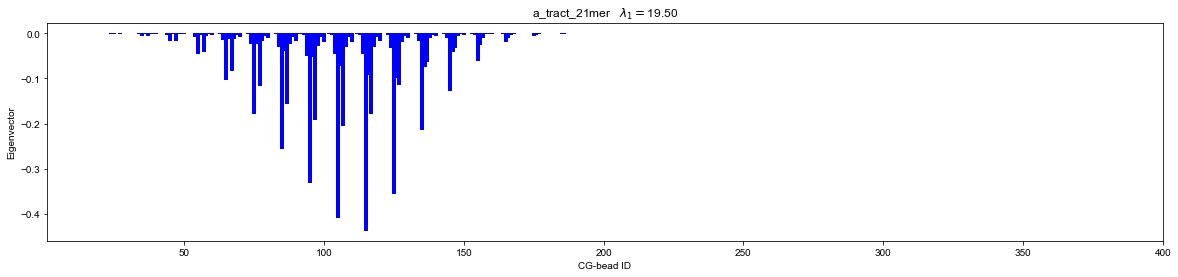

In [57]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

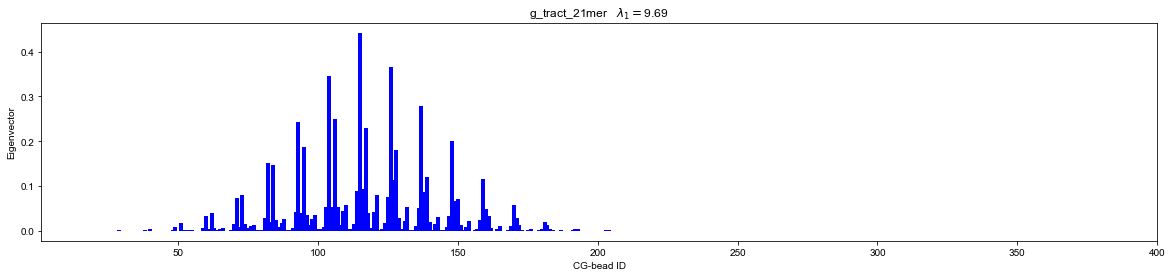

In [46]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

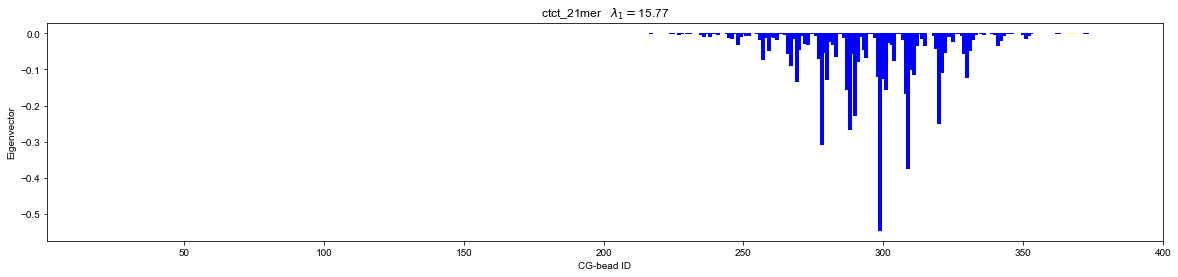

In [34]:
sele_id = 1
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'{host}   $\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()

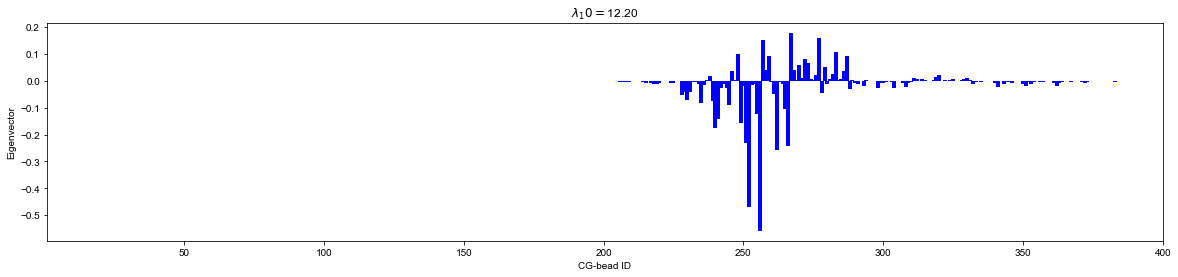

In [32]:
sele_id = 10
w_sele = w[sele_id-1]
v_sele = v[:, sele_id-1]
x = range(1, g_agent.n_node+1)

fig, ax = plt.subplots(figsize=(20, 4))
title = f'$\lambda_{sele_id}=$' + f'{w_sele:.2f}'
ax.set_title(title)
ax.vlines(x, 0, v_sele, colors='b', lw=4)
ax.set_xlabel("CG-bead ID")
ax.set_ylabel("Eigenvector")
ax.set_xlim(1, g_agent.n_node+1)

plt.show()